In [151]:
# Import necessary modules for data cleaning and data visualization
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory data analysis

We will first load in data files

In [152]:
dot_traffic_stations = pd.read_csv("dot_traffic_stations_2015.txt", sep = ',')
dot_traffic_stations.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,...,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,...,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


Get some info

In [153]:
dot_traffic_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

We will mainly focus on traffic data

In [154]:
dot_traffic = pd.read_csv("dot_traffic_2015.txt")
dot_traffic.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,...,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,83,61,55,35,29,21,23,9,7,15


In [155]:
dot_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

In [156]:
# Find columns with null values
dot_traffic.columns[dot_traffic.isnull().sum() > 0]


Index(['restrictions'], dtype='object')

In [157]:
dot_traffic.restrictions.nunique()

0

In [158]:
dot_traffic.record_type.nunique()

1

In [159]:
dot_traffic['year_of_data'].nunique()

1

Upon closer look at the data, I will remove restrictions column, record type and year of data as it's redundant.
Other than that, the dataset looks great as other columns do not have missing values.


In [160]:
dot_traffic= dot_traffic.drop(columns=['restrictions','record_type','year_of_data'])


As direction_of_travel is just the encoded value of direction_of_travel_name, direction_of_travel will be dropped. 
This is the same for functional classification

In [161]:
dot_traffic= dot_traffic.drop(columns=['direction_of_travel','functional_classification'])

We will convert date column to datetime datatype and a new feature called day of month

In [162]:
dot_traffic['date'] = pd.to_datetime(dot_traffic['date'])
dot_traffic['day_of_month'] = dot_traffic.date.dt.day
dot_traffic.head()

,date,day_of_data,day_of_week,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,traffic_volume_counted_after_0000_to_0100,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,day_of_month
0,2015-04-07,7,3,North,56,Rural: Principal Arterial - Other,1,4,000084,4,...,89,122,124,110,69,73,28,12,6,7
1,2015-09-26,26,7,West,21,Urban: Principal Arterial - Interstate,2,9,056P94,381,...,1617,1669,1308,1068,928,885,798,650,613,26
2,2015-06-16,16,3,East,6,Urban: Principal Arterial - Interstate,0,6,077590,585,...,4244,4405,4609,4361,3272,2243,2050,1453,892,16
3,2015-04-26,26,1,South,55,Urban: Principal Arterial - Interstate,1,4,450001,105,...,1011,959,851,708,559,457,297,207,110,26
4,2015-05-23,23,7,East,4,Rural: Minor Arterial,0,5,102210,6,...,83,61,55,35,29,21,23,9,7,23


For easy grabbing 24 columns of hours text, i created a list just for that.

In [163]:
traffic_hours_columns = []
for col  in dot_traffic.columns.values.tolist():
    if "traffic_volume_counted" in col:
        traffic_hours_columns.append(col)
traffic_hours_columns



['traffic_volume_counted_after_0000_to_0100',
 'traffic_volume_counted_after_0100_to_0200',
 'traffic_volume_counted_after_0200_to_0300',
 'traffic_volume_counted_after_0300_to_0400',
 'traffic_volume_counted_after_0400_to_0500',
 'traffic_volume_counted_after_0500_to_0600',
 'traffic_volume_counted_after_0600_to_0700',
 'traffic_volume_counted_after_0700_to_0800',
 'traffic_volume_counted_after_0800_to_0900',
 'traffic_volume_counted_after_0900_to_1000',
 'traffic_volume_counted_after_1000_to_1100',
 'traffic_volume_counted_after_1100_to_1200',
 'traffic_volume_counted_after_1200_to_1300',
 'traffic_volume_counted_after_1300_to_1400',
 'traffic_volume_counted_after_1400_to_1500',
 'traffic_volume_counted_after_1500_to_1600',
 'traffic_volume_counted_after_1600_to_1700',
 'traffic_volume_counted_after_1700_to_1800',
 'traffic_volume_counted_after_1800_to_1900',
 'traffic_volume_counted_after_1900_to_2000',
 'traffic_volume_counted_after_2000_to_2100',
 'traffic_volume_counted_after_210

We will also generate daily total traffic volume by summing up all the traffic of all the hours of a day

In [164]:
dot_traffic['total_daily_traffic_volume'] = dot_traffic[traffic_hours_columns].sum(axis=1)
dot_traffic

,date,day_of_data,day_of_week,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,traffic_volume_counted_after_0000_to_0100,...,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,day_of_month,total_daily_traffic_volume
0,2015-04-07,7,3,North,56,Rural: Principal Arterial - Other,1,4,000084,4,...,122,124,110,69,73,28,12,6,7,2042
1,2015-09-26,26,7,West,21,Urban: Principal Arterial - Interstate,2,9,056P94,381,...,1669,1308,1068,928,885,798,650,613,26,20818
2,2015-06-16,16,3,East,6,Urban: Principal Arterial - Interstate,0,6,077590,585,...,4405,4609,4361,3272,2243,2050,1453,892,16,71842
3,2015-04-26,26,1,South,55,Urban: Principal Arterial - Interstate,1,4,450001,105,...,959,851,708,559,457,297,207,110,26,12349
4,2015-05-23,23,7,East,4,Rural: Minor Arterial,0,5,102210,6,...,61,55,35,29,21,23,9,7,23,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140386,2015-01-25,25,1,South,41,Rural: Minor Arterial,0,1,024020,7,...,61,50,48,37,16,17,5,4,25,759
7140387,2015-10-08,8,5,West,53,Urban: Principal Arterial - Interstate,2,10,P29AAA,12,...,986,970,534,347,209,141,80,57,8,8961
7140388,2015-05-25,25,2,East,15,Urban: Principal Arterial - Interstate,5,5,001162,81,...,621,560,485,340,307,272,152,110,25,10619
7140389,2015-10-07,7,4,East,48,Urban: Principal Arterial - Interstate,0,10,000165,664,...,6286,4962,6293,4786,3295,2764,2148,1175,7,102583


# Finding patterns
Let's now find some patterns from data using visualizations. We will mainly feature engineering the data by groupby function is pandas which allows us to group your data and perform computations. We will mainly use Plotly to plot some bar chart and line chart visualizations that allow you to interact as well as matplotlib and seaborn for heatmap!

To visualize the traffic patterns, we will make use of the follow data:
- hour of day
- day of week
- day of month
- monthly
- direction of travel
- functional name (The kind of roads that people travel)
- state
- lane

Let's first visualize the traffic data by hour and day of week

In [165]:
day_of_week_hour_fig = px.line(dot_traffic.groupby(['day_of_week'])[traffic_hours_columns].mean().reset_index(),
              x="day_of_week", y=traffic_hours_columns, title='Average traffic volume by day of week and hour')
day_of_week_hour_fig.show()


We can see that traffic volume generally increases sharply on Mondays across all hours, with a stable gradual rate of increase until Friday. This rise is in sharp contrast with that on Saturday and Sunday.


During the weekends, while "normal" hours experience a drastic decline in traffic flow, "less normal" hours such as 10-11am/11-12am and "odd" hours of 12-1am witness an abnormal increase in traffic.  


These can be credited to the fact that during weekdays, traffic follows business hours (i.e. 9-5) where more people are out traveling, and during weekends, less people travel and they do so later than usual.

In [166]:
# We will first create a list containing sum of total traffic by hour
total_traffic_by_hour = []
for col in traffic_hours_columns:
    total_traffic_by_hour.append(dot_traffic[col].sum())
# Plot bar chart after creating a dataframe consist of 2 columns: traffic hour and total
hour_fig = px.bar(pd.DataFrame(list(zip(traffic_hours_columns, total_traffic_by_hour)),
               columns =['traffic_hours_columns', 'Total']),
              y="traffic_hours_columns", x="Total", title='Total traffic by hour')

hour_fig.show()


When hovering on the bars, we can see that traffic surge twice between 7 to 8am in the morning, and 4 to 5pm in the afternoon. Traffic in the afternoon is higher than in the morning. 

In [167]:
day_of_week_fig = px.bar(dot_traffic.groupby(['day_of_week'])['total_daily_traffic_volume'].mean().reset_index(),
              x="day_of_week", y="total_daily_traffic_volume", title='Average traffic by day of week')
day_of_week_fig.show()


We can see that total daily avarage traffic increases during the week and peak on Friday then decreases during the weekends.

In [168]:
day_of_month_fig = px.bar(dot_traffic.groupby(['day_of_month'])['total_daily_traffic_volume'].mean().reset_index(),
              x="day_of_month", y="total_daily_traffic_volume", title='Average traffic by day of month')
day_of_month_fig.show()


We can see that through the month, traffic remains similar. If we look closely, there is small increase towards the end of the month but the increase is almost negligible.

In [169]:
year_fig = px.line(dot_traffic.groupby(['date'])['total_daily_traffic_volume'].mean().reset_index(),
               x="date",
               y='total_daily_traffic_volume',
               title='Traffic over the year')
year_fig.update_yaxes(automargin=True)

year_fig.show()


We can that traffic tends to be higher in the middle of the year! Perhaps people like to travel in the summer!

<AxesSubplot:xlabel='day_of_month', ylabel='month_of_data'>

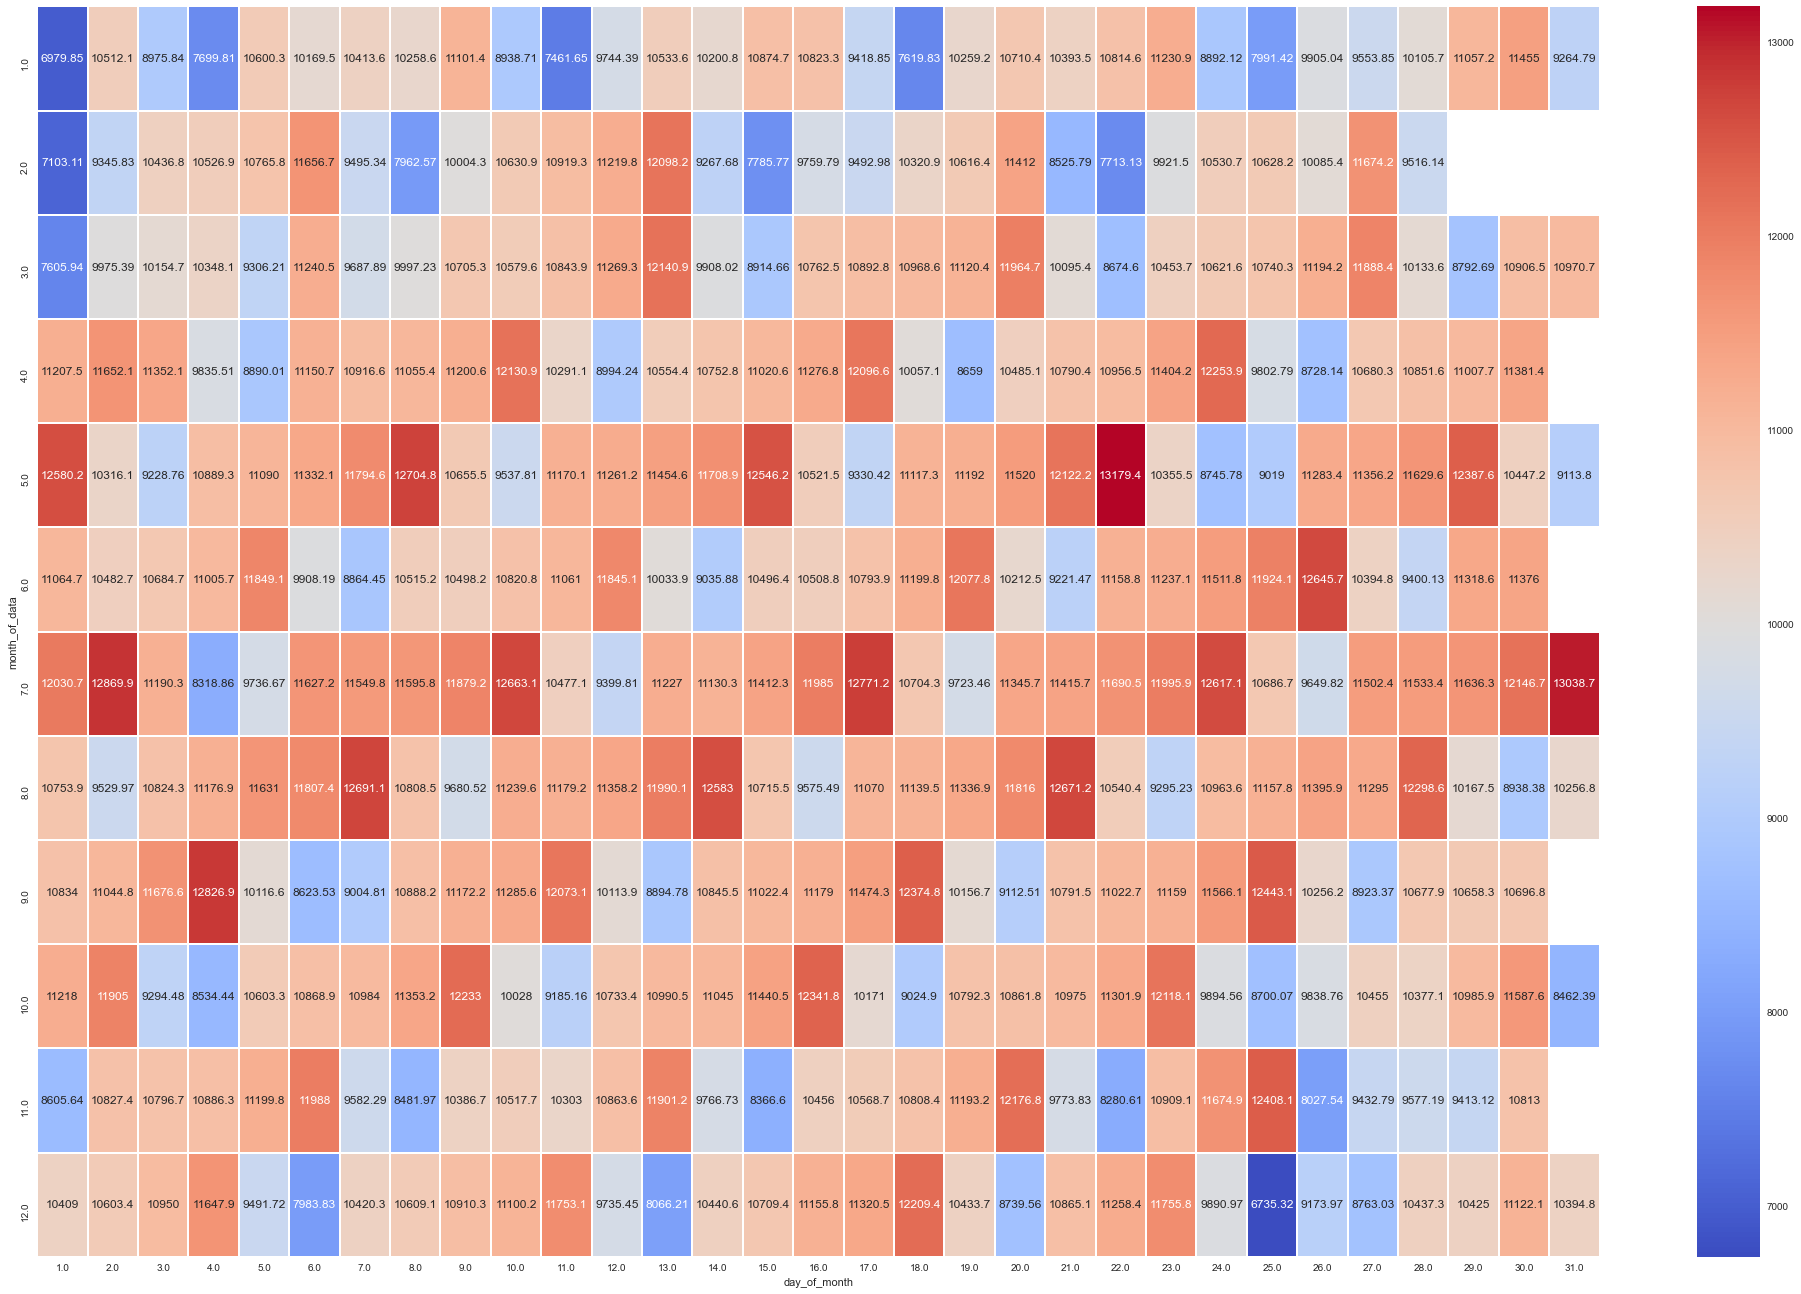

In [170]:
traffic_by_day = dot_traffic.groupby(['date'])[["day_of_month","month_of_data",'total_daily_traffic_volume']].mean()
traffic_by_day_pivot = traffic_by_day.pivot(columns='day_of_month', index='month_of_data', values='total_daily_traffic_volume')
fig, ax = plt.subplots(figsize=(35,23))        
sns.heatmap(traffic_by_day_pivot, annot=True,cmap="coolwarm",linewidths=.05, fmt='g')


We can also view the heatmaps of traffic by different day and month. We can see some biggest dip in traffic during holidays such as 25/12 or 1/1.

Next we will visualize how the American travel

In [171]:
functional_fig = px.bar(dot_traffic.groupby(['functional_classification_name'])['total_daily_traffic_volume'].mean().reset_index(),
              x="functional_classification_name", y="total_daily_traffic_volume", 
              title='Average traffic by functional name')
functional_fig.show()


The majority of traffic in the US are in the Princial Arterial, mostly in the Urban areas.

We can also view the traffic throughout different day of week by different function names.

<AxesSubplot:xlabel='functional_classification_name', ylabel='day_of_week'>

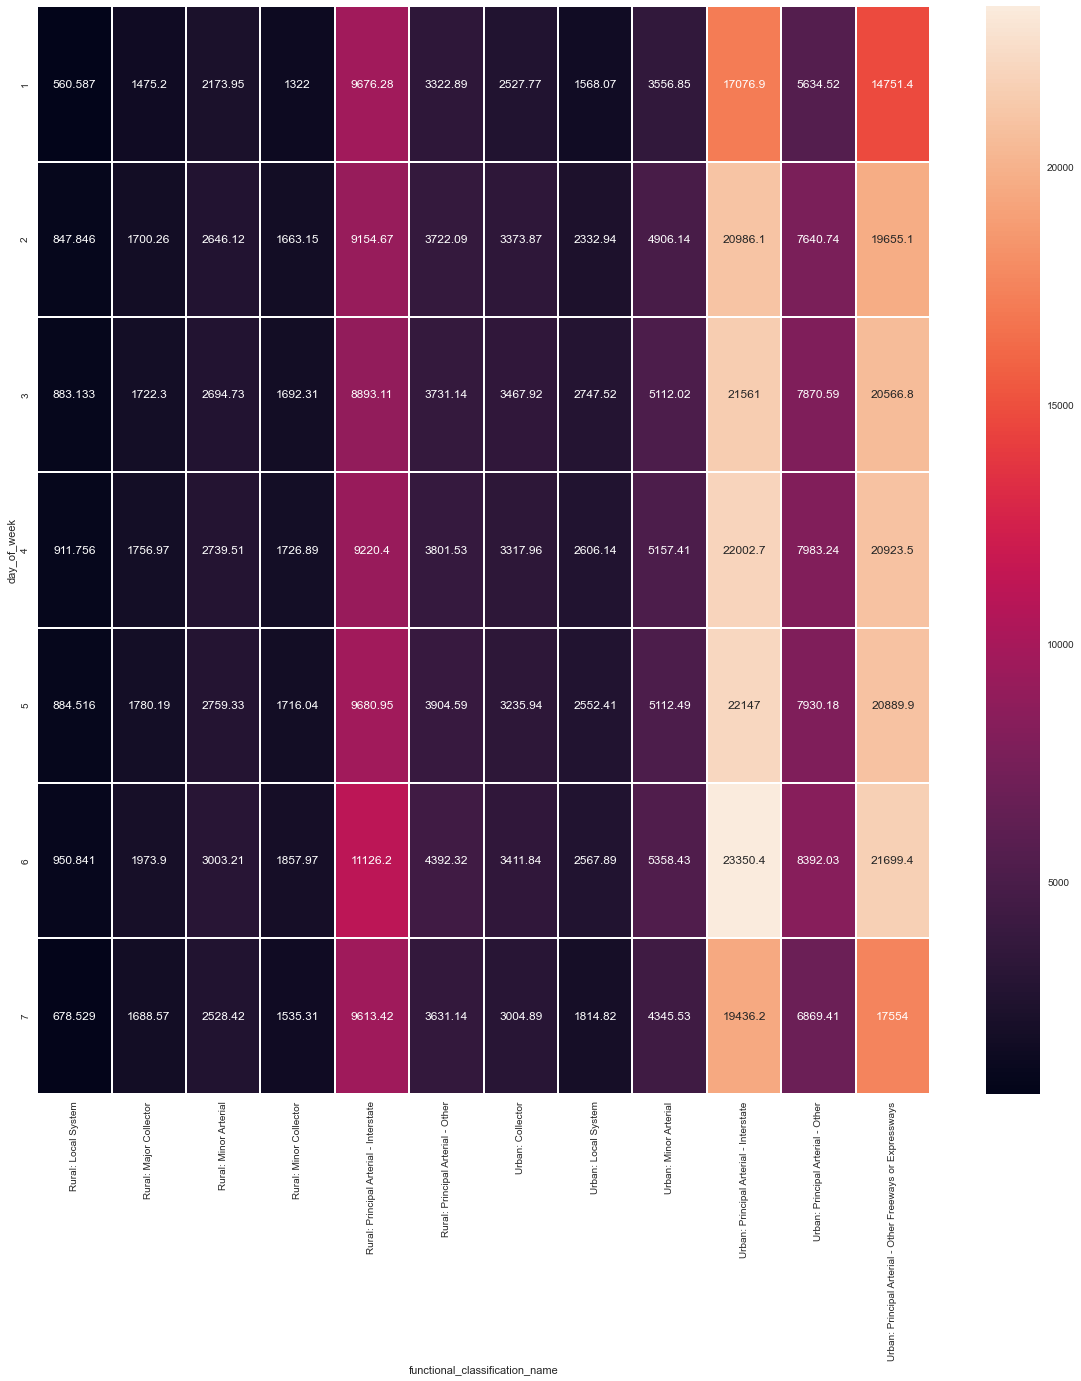

In [172]:
functional_by_day_of_week = dot_traffic.groupby(['functional_classification_name','day_of_week'])['total_daily_traffic_volume'].mean().reset_index()
fig, ax = plt.subplots(figsize=(20,20))        
sns.heatmap(functional_by_day_of_week.pivot(columns='functional_classification_name',
                                            index='day_of_week', values='total_daily_traffic_volume'),
                                            annot=True,linewidths=.05, fmt='g', )

We can see that the Rural: Principal Arterial - Interstate has a big jump in traffic on Friday while others might only increase slight. Perhaps on Friday, a lot of people travels out to rural areas.

We might also be interested in the main directions of the traffic flow.

In [173]:
direction_fig = px.bar(dot_traffic.groupby(['direction_of_travel_name'])['total_daily_traffic_volume'].sum().reset_index(),
              x="direction_of_travel_name", y="total_daily_traffic_volume", 
              title='Average traffic by direction of travel')
direction_fig.show()


North-South seems to be the most common directions, followed closely by East-West

Traffic data also include fips state code, we can see which states has the most total traffic

In [174]:
traffic_by_fips_state_code = dot_traffic.groupby(['fips_state_code'])['total_daily_traffic_volume'].sum().reset_index()
traffic_by_fips_state_code.head()

,fips_state_code,total_daily_traffic_volume
0,1,1461509905
1,2,322181809
2,4,5600393206
3,5,420285174
4,6,6670234797


Our data doesn't include state names. But fret not, there is a package that contains US general data called us. 

We can simply install it by !pip install us

In [175]:
import us
# Initialize fips to name mapping
fips_to_name = us.states.mapping("fips", "name")

# We need to add "0" to fips state code with only 1 digits. 
traffic_by_fips_state_code.fips_state_code = traffic_by_fips_state_code.fips_state_code.astype(str).str.zfill(2)

traffic_by_fips_state_code["states"] = traffic_by_fips_state_code["fips_state_code"].map(fips_to_name)
traffic_by_fips_state_code.head()

,fips_state_code,total_daily_traffic_volume,states
0,01,1461509905,Alabama
1,02,322181809,Alaska
2,04,5600393206,Arizona
3,05,420285174,Arkansas
4,06,6670234797,California


A quick check showed that the state codes and state names are correct. Now let's see which state has the most traffic.

In [176]:
state_fig = px.bar(traffic_by_fips_state_code, x="states", y="total_daily_traffic_volume", 
              title='total traffic by state')
state_fig.update_layout(xaxis={'categoryorder':'total descending'})

state_fig.show()


We can see that Virginia, California and Arizona has the highest total traffic!

The last piece of useful data is lane of travel. Let's find out what does each lane of travel represent

In [177]:
dot_traffic_stations['lane_of_travel_name'].unique()

array(['Other lanes', 'Outside (rightmost) lane',
       'Data with lanes combined'], dtype=object)

In [178]:
dot_traffic_stations['lane_of_travel'].unique()

array([4, 1, 2, 0, 3, 6, 5, 7, 8, 9], dtype=int64)

So the traffic stations only captures 3 types of lane name and 9 different lanes. Let see what each lane name corresponds to

In [179]:
dot_traffic_stations[['lane_of_travel_name','lane_of_travel']][dot_traffic_stations['lane_of_travel_name']=='Other lanes'].head()

,lane_of_travel_name,lane_of_travel
0,Other lanes,4
2,Other lanes,2
4,Other lanes,4
7,Other lanes,2
10,Other lanes,2


In [180]:
dot_traffic_stations[['lane_of_travel_name','lane_of_travel']][dot_traffic_stations['lane_of_travel_name']=='Outside (rightmost) lane'].head()

,lane_of_travel_name,lane_of_travel
1,Outside (rightmost) lane,1
3,Outside (rightmost) lane,1
5,Outside (rightmost) lane,1
6,Outside (rightmost) lane,1
8,Outside (rightmost) lane,1


In [181]:
dot_traffic_stations[['lane_of_travel_name','lane_of_travel']][dot_traffic_stations['lane_of_travel_name']=='Data with lanes combined'].head()

,lane_of_travel_name,lane_of_travel
9,Data with lanes combined,0
13,Data with lanes combined,0
16,Data with lanes combined,0
19,Data with lanes combined,0
21,Data with lanes combined,0


So lane 0 means data with lanes combined. Lane 1 is outside (rightmost) lane. Lane 2-9 is 'others'

In [182]:
lane_fig = px.bar(dot_traffic.groupby(['lane_of_travel'])['total_daily_traffic_volume'].sum().reset_index(),
              x="lane_of_travel", y="total_daily_traffic_volume", 
              title='total traffic by lane')
lane_fig.update_layout(xaxis={'categoryorder':'total descending'})

lane_fig.show()


The majority of sensors data combines the lane data. Apart from that, we can now see that there are more traffic on the right sides!

These were some interesting patterns that we can derive from the traffic dataset! The next part of this notebook will be modelling the data

# Model the traffic data with Pycaret

We would like to model the traffic data using machine learning techniques. For this purpose, I will be using Pycaret.
PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows.

The installation instructions for Pycaret is at https://pycaret.org/install/. For my Jupyter Notebook, to prevent potential conflict with other Python packages, I created a new Conda environment and install Pycaret into it. 

Just a quick recap, this is the traffic data throughout the whole year and we want our model to recognize the patterns from this

In [183]:
year_fig.show()

We will first feature engineer the dataset for our models. Date, day of month, month and day of week will be used as the features

In [184]:
data = dot_traffic.groupby(['date',"day_of_month","month_of_data","day_of_week"])[['total_daily_traffic_volume']].mean().reset_index()
data.head()

,date,day_of_month,month_of_data,day_of_week,total_daily_traffic_volume
0,2015-01-01,1,1,5,6979.852774
1,2015-01-02,2,1,6,10512.127460
2,2015-01-03,3,1,7,8975.839717
3,2015-01-04,4,1,1,7699.811064
4,2015-01-05,5,1,2,10600.328704


We will split the 80% of the dataset to be used for training, the remaining 20% are unseen data that will be used for validation

In [185]:
from pycaret.regression import * 
train_test_data = data.sample(frac=0.8, random_state=123)
validation_data = data.drop(train_test_data.index)


We can initialize Pycaret by simply using setup() where we choose the data and target column!

In [186]:
exp_reg101 = setup(data = train_test_data, test_data = validation_data, target = 'total_daily_traffic_volume',  session_id = 123)


,Description,Value
0,session_id,123
1,Target,total_daily_traffic_volume
2,Original Data,"(292, 5)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(292, 22)"


We will run compare_models() which will fit various machine learning models on the dataset and then sort the results based on R2 score

In [187]:
best = compare_models(sort = 'R2')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,331.0485,366944.8027,544.0627,0.7355,0.0557,0.0340,0.0100
ridge,Ridge Regression,352.2850,375866.7406,552.9242,0.7274,0.0562,0.0359,0.0050
lasso,Lasso Regression,352.3860,378494.1500,553.3437,0.7253,0.0562,0.0359,0.3570
lr,Linear Regression,353.7975,378507.0547,554.0628,0.7251,0.0562,0.0360,0.7120
lar,Least Angle Regression,353.7994,378500.1577,554.0556,0.7251,0.0562,0.0360,0.0070
llar,Lasso Least Angle Regression,350.2910,380571.6542,555.8753,0.7242,0.0565,0.0358,0.0060
catboost,CatBoost Regressor,338.6340,417182.1906,592.7275,0.6915,0.0606,0.0349,0.5310
lightgbm,Light Gradient Boosting Machine,397.3653,445743.6892,611.5363,0.6715,0.0623,0.0404,0.0130
rf,Random Forest Regressor,398.1353,452361.3400,623.7983,0.6637,0.0637,0.0406,0.0550
gbr,Gradient Boosting Regressor,364.7462,458333.1510,610.5629,0.6562,0.0632,0.0374,0.0110


Huber Regressor seems to perform the best with R2 of around 0.7, Root Mean Squared Error of 544 is also not bad, the lowest of all models!

We will then create the model. When creating, we can also see the 10-fold cross validation results.

In [188]:
best_model = create_model('huber')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,376.9491,504131.1841,710.0220,0.6242,0.0719,0.0390
1,365.0970,261757.4404,511.6224,0.8349,0.0496,0.0357
2,285.1871,115082.9128,339.2387,0.9380,0.0337,0.0279
3,306.8830,192663.4808,438.9345,0.8408,0.0404,0.0283
4,387.9988,632508.0370,795.3037,0.4421,0.0876,0.0435
5,193.1048,93207.2200,305.2986,0.9279,0.0305,0.0189
6,258.2995,145476.3694,381.4136,0.8452,0.0397,0.0256
7,307.8789,204665.8609,452.4001,0.8310,0.0445,0.0292
8,590.9528,1421201.5998,1192.1416,0.1652,0.1277,0.0690
9,238.1337,98753.9216,314.2514,0.9057,0.0308,0.0229


Finetuning of model is also just another quick function. This is done using randomized grid search in the backend, by default it will optimize the 'R2' score

In [189]:
best_model = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,422.4570,527325.8134,726.1720,0.6069,0.0753,0.0445
1,395.2646,293616.2026,541.8636,0.8148,0.0574,0.0409
2,258.5525,112553.5875,335.4901,0.9394,0.0351,0.0260
3,288.9674,187530.7635,433.0482,0.8450,0.0393,0.0263
4,387.7208,693867.1002,832.9869,0.3880,0.0915,0.0441
5,213.0291,75177.8039,274.1857,0.9419,0.0277,0.0209
6,250.3606,148856.2831,385.8190,0.8416,0.0410,0.0254
7,244.4510,124316.9723,352.5861,0.8973,0.0332,0.0229
8,575.6202,1365491.5820,1168.5425,0.1979,0.1258,0.0676
9,205.3144,87602.4316,295.9771,0.9164,0.0280,0.0196


This is the our model with the parameters.

In [190]:
print(best_model)

HuberRegressor(alpha=0.01, epsilon=1.1, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


We will then test the model on the unseen data

In [191]:
prediction_holdout = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,318.0380,235417.6810,485.1986,0.8176,0.0473,0.0318


The RMSE and R2 is even better than the training set! The model is not overfitted or underfitted and perform well on unseen data.

While R2 and RMSE looks decent. It's highly important to look at the residual and prediction error plot.

Let's take a look at residuals plot and prediction error plot using the built-in plot_model function.

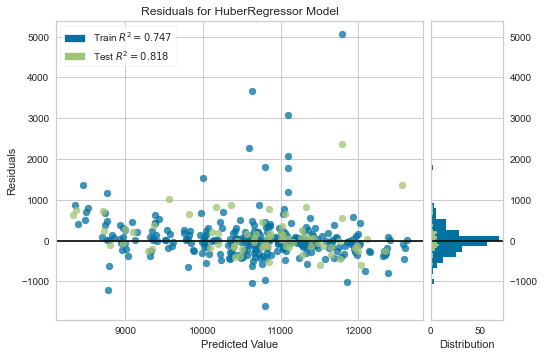

In [192]:
plot_model(best_model)


The residuals are pretty symmetrically distributed, tending to cluster towards the middle of the plot. This is a good model.

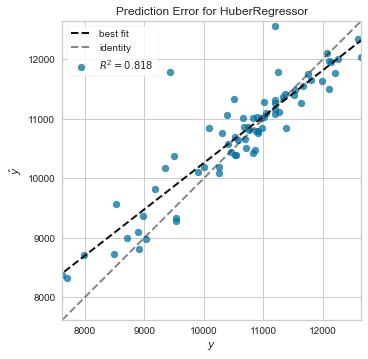

In [193]:
plot_model(best_model, plot = 'error')


Apart from some "anomaly" values, the line of best fit seems to generalize well.

Let's visualize the predictions points on the actual traffic data plot we saw earlier.

In [194]:
# Get dataframe of predictions
predictions = predict_model(best_model, data=validation_data)
predictions.head()

,date,day_of_month,month_of_data,day_of_week,total_daily_traffic_volume,Label
1,2015-01-02,2,1,6,10512.127460,11330.452976
2,2015-01-03,3,1,7,8975.839717,9361.984589
3,2015-01-04,4,1,1,7699.811064,8322.481436
17,2015-01-18,18,1,1,7619.825890,8366.931244
18,2015-01-19,19,1,2,10259.172445,10086.973915


In [195]:
# Concatenate validation data prediction with train data
predict_train_concat = pd.concat([predictions,train_test_data])

In [196]:
import plotly.graph_objs as go

fig12 = px.line(data, x="date", y=['total_daily_traffic_volume'], title='Traffic over the year', template = 'plotly_dark')
fig12.add_trace(go.Scatter(x=predict_train_concat.date.tolist(), y=predict_train_concat.Label.tolist(), mode = 'markers', 
                name = 'Predictions', 
                marker=dict(color='red',size=5)))
fig12.show()


Most predictions seems to be within the line plot.

We can make a scatter plots to visualize this even better.

In [197]:
fig13 = px.scatter(predictions, x="date", y=['total_daily_traffic_volume','Label'], title='Traffic over the year', template = 'plotly_dark')
fig13.show()


We can see that the predictions are closer to actual when they are on the "normal" days but not so much for some days when there are particularly more or less traffic.

From the plots and metrics, can see that the model perform generally well, except for some anamaly data which in reality might be real anomalies such as holidays, etc.


Considering that we use relatively few features, the model performs admirably well.
With more features such as weather and holidays, the model should perform even better. 

We can now save the model.

In [198]:
save_model(best_model, 'huber_regressor_us_traffic_2015')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_daily_traffic_volume',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                 ('dummy', Dummify(target='total_daily_traffic_volume')),
                 ('fix_perfect',
                  Remove_100(target='total_daily_traffic_volume')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough

The model is saved as pkl file in the same directory. It can also be loaded next time using load_model().

In [199]:
saved_model = load_model('huber_regressor_us_traffic_2015')


Transformation Pipeline and Model Successfully Loaded


We can perform further prediction with predict_model() by adding in our saved_model and the test dataframe

# Unsupervised anomaly detection

The last thing we can try is anomaly detection with traffic data.

We first need to import anomaly modules and setup the data.

In [200]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)


,Description,Value
0,session_id,123
1,Original Data,"(365, 5)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(365, 44)"
9,CPU Jobs,-1


We can view a list of all anomaly models available.

In [201]:
# check list of available models
models()


,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


We can create an isolation forest model from the list above then we apply the model on the dataset. For this dataset, we'll set the fraction of anomaly data to be 5% of total data.

In [202]:
iforest = create_model('iforest', fraction = 0.05)
iforest_results = assign_model(iforest)
iforest_results.head()


,date,day_of_month,month_of_data,day_of_week,total_daily_traffic_volume,Anomaly,Anomaly_Score
0,2015-01-01,1,1,5,6979.852774,1,0.041486
1,2015-01-02,2,1,6,10512.127460,0,-0.053390
2,2015-01-03,3,1,7,8975.839717,0,-0.048053
3,2015-01-04,4,1,1,7699.811064,0,-0.055470
4,2015-01-05,5,1,2,10600.328704,0,-0.049137


We can take a quick look at the model results.

In [203]:
iforest_results[iforest_results['Anomaly'] == 1].head()


,date,day_of_month,month_of_data,day_of_week,total_daily_traffic_volume,Anomaly,Anomaly_Score
0,2015-01-01,1,1,5,6979.852774,1,0.041486
30,2015-01-31,31,1,7,9264.793306,1,0.005751
31,2015-02-01,1,2,1,7103.108541,1,0.020512
58,2015-02-28,28,2,7,9516.137511,1,0.007407
59,2015-03-01,1,3,1,7605.941713,1,0.004186


We can plot the anomaly value on the traffic plot that we saw earlier.

In [204]:
fig14 = px.line(iforest_results, x=iforest_results.date, y="total_daily_traffic_volume",
                title='Unsupervised anomaly detection daily traffic data')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].date.to_list()
# obtain y value of anomalies to plot
anomalies = iforest_results[iforest_results['Anomaly'] == 1].total_daily_traffic_volume.to_list()

fig14.add_trace(go.Scatter(x=outlier_dates, y=anomalies, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=8)))
        
fig14.show()


We can see that the models were able to pick up some anomaly dates such as 31/12 or 1/1 or 31/5 which are public holidays in US. Some other anomalies are days that see unusually low traffic such as 31/1 and 1/2 would also be worth looking at!

We can save this model for later use

In [205]:
save_model(iforest, 'iforest_anomaly_detection_us_traffic')


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IFo

We have reached the end of this notebook. So far we have taken a peak at the dataset, perform some feature engineering and then visualize the data to gain some insights. Lastly we have tried various models to model the data and detect anomalies in the data.

Thank you for reading!